# Scaling Exercises
- Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

Here is a histogram of the dataset we will be working with.


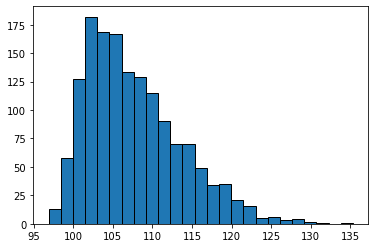

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

np.random.seed(123)

x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1, 1)

plt.hist(x, bins=25,ec='black')
print('Here is a histogram of the dataset we will be working with.')

## 1. 

In [2]:
x_train_and_validate, x_test = train_test_split(x, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

## 2. 

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

## 3. 

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

## 4. 

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

## 5. 

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!